## Using SVD to decompose an image


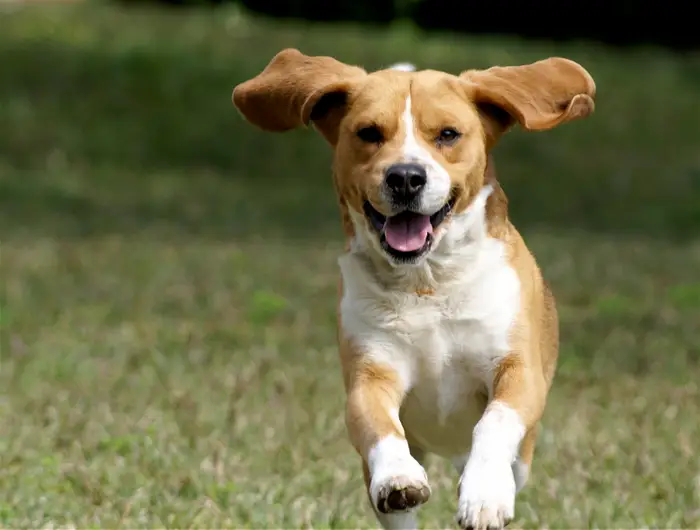

In [17]:
# Load image.
import webp
im = webp.load_image("data/dog.webp")  # Returns a pillow.Image object.
im

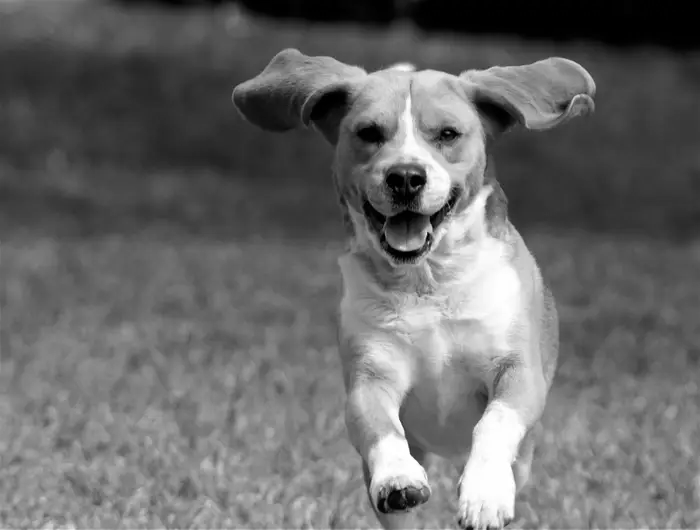

In [18]:
# Convert it to grayscale.
im = im.convert("L")
im

In [19]:
# What are the dimensions?
im.size

(700, 530)

In [20]:
# Convert to a numpy array.
import numpy as np
pix = np.asarray(im)  # This array should be read-only.

In [21]:
pix.shape

(530, 700)

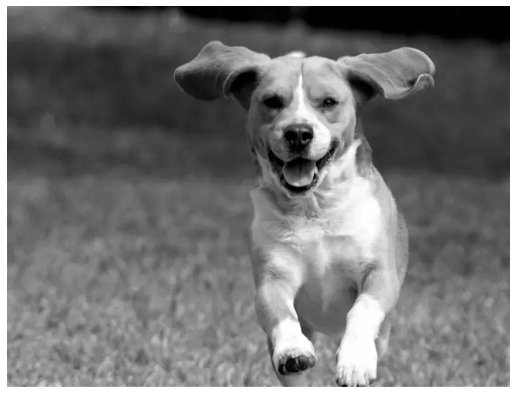

In [22]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 7]
plt.gray();
plt.axis("off");
plt.imshow(pix);

In [23]:
# SVD
U, S, Vh = np.linalg.svd(pix, full_matrices=False)

print(f"Dimension of U: {U.shape}")
print(f"Dimension of S: {S.shape}")
print(f"Dimension of Vh: {Vh.shape}")

Dimension of U: (530, 530)
Dimension of S: (530,)
Dimension of Vh: (530, 700)


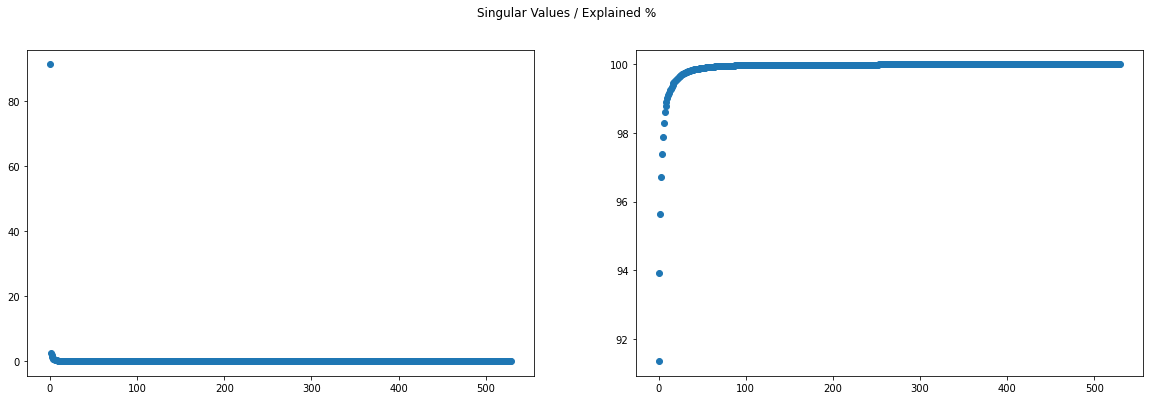

In [25]:
plt.rcParams["figure.figsize"] = [20, 6]
fig, axs = plt.subplots(1, 2);
fig.suptitle("Singular Values / Explained %");
axs[0].plot(S**2 / np.sum(S**2) * 100, "o");
axs[1].plot(np.cumsum(S**2) / np.sum(S**2) * 100, "o");

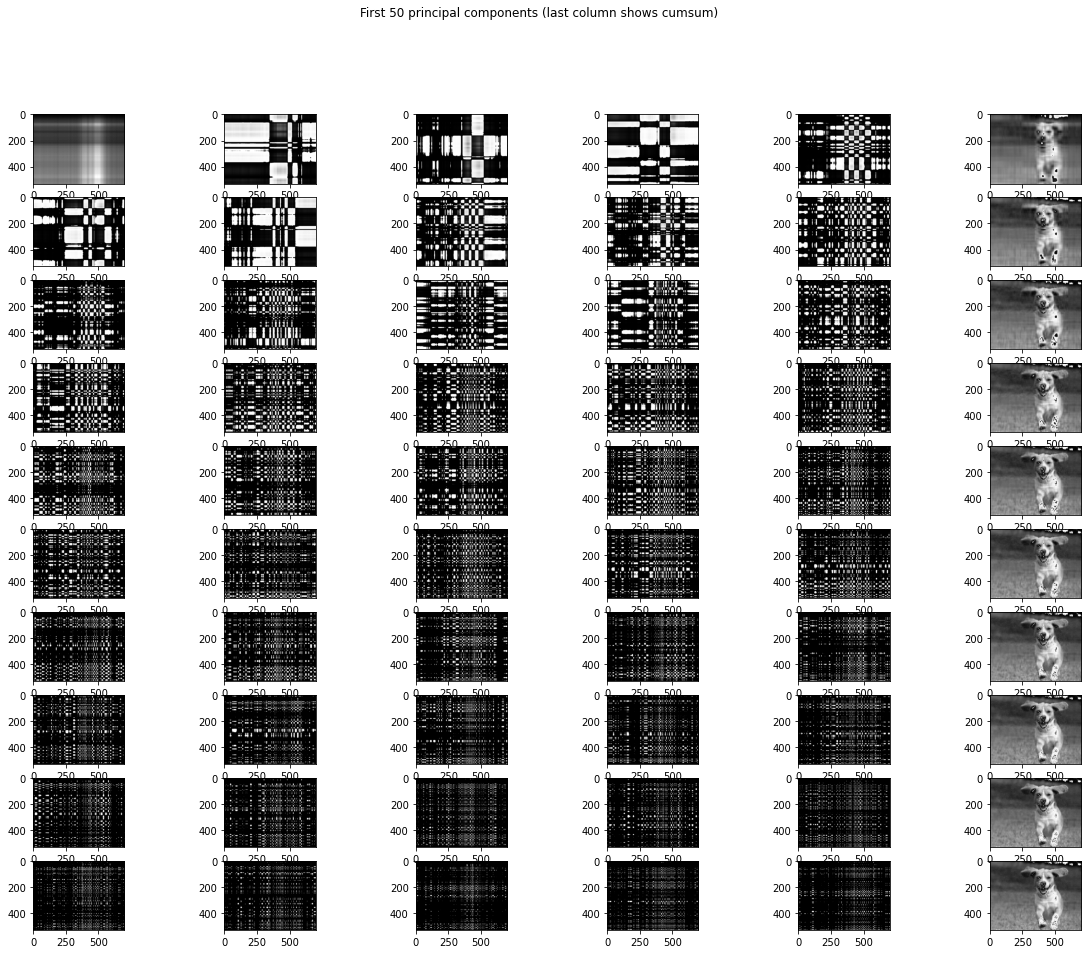

In [14]:
# What do the principal components look like?
plt.rcParams["figure.figsize"] = [20, 15]
fig, axs = plt.subplots(10, 6, squeeze=False);
fig.suptitle("First 50 principal components (last column shows cumsum)");
pcs = np.zeros_like(pix)
for i in range(10):
    k = 5 * i
    for j in range(5):
        pc = U[:,[k+j]] * S[k+j] @ Vh[[k+j],:]
        pc = pc.astype("uint8", copy=False)
        axs[i, j].imshow(pc);
        pcs += pc
    axs[i, 5].imshow(pcs);

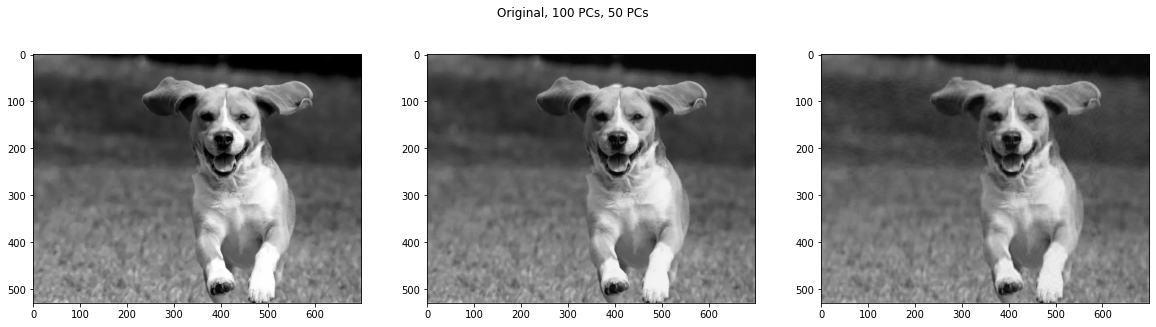

In [11]:
# Other combinations of principal components.
plt.rcParams["figure.figsize"] = [20, 5]
fig, axs = plt.subplots(1, 3);
fig.suptitle("Original, 100 PCs, 50 PCs");
axs[0].imshow(pix);
axs[1].imshow(U[:,:100] @ np.diag(S[:100]) @ Vh[:100,:]);
axs[2].imshow(U[:,:50] @ np.diag(S[:50]) @ Vh[:50,:]);

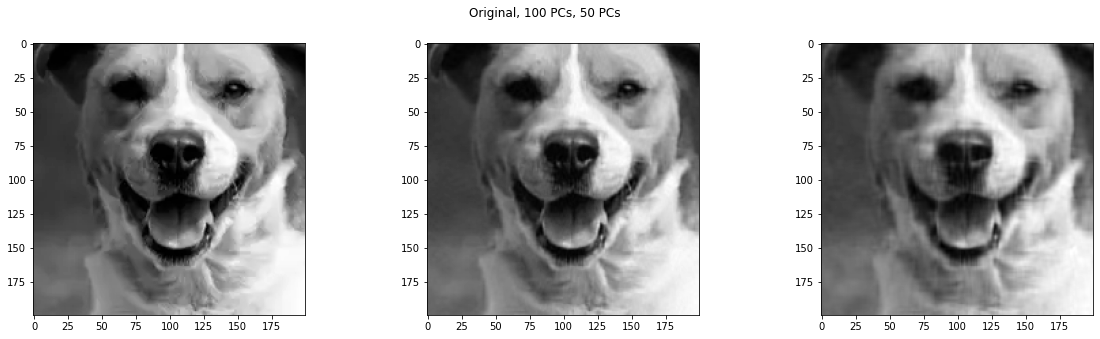

In [12]:
# Detais of the face.
plt.rcParams["figure.figsize"] = [20, 5]
fig, axs = plt.subplots(1, 3);
fig.suptitle("Original, 100 PCs, 50 PCs");
axs[0].imshow(pix[100:300, 300:500]);
axs[1].imshow((U[:,:100] @ np.diag(S[:100]) @ Vh[:100,:])[100:300, 300:500]);
axs[2].imshow((U[:,:50] @ np.diag(S[:50]) @ Vh[:50,:])[100:300, 300:500]);